# Data Loading and Preprocessing

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data augmentation and normalization
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Loading training, validation, and testing datasets
train_data = data_gen.flow_from_directory(
    'data/train',
    target_size=(64, 64),
    batch_size=64,
    subset='training'
)

val_data = data_gen.flow_from_directory(
    'data/val',
    target_size=(64, 64),
    batch_size=64,
    subset='validation'
)

test_data = data_gen.flow_from_directory(
    'data/test',
    target_size=(64, 64),
    batch_size=64
)

Found 634 images belonging to 2 classes.
Found 19 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


# Convolutional Neural Network

In [26]:
model = models.Sequential()

# first convolutional block
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# second
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# third
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# fourth 
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# flattening and dense layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

# Model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,726,626 (10.40 MB)

 Trainable params: 2,726,562 (10.40 MB)

 Non-trainable params: 64 (256.00 B)

# Compiling and Training

In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

# Save the model
model.save("modelCNN.keras")

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 322ms/step - accuracy: 0.9722 - loss: 0.0790 - val_accuracy: 0.4737 - val_loss: 1.4209
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 288ms/step - accuracy: 0.9678 - loss: 0.0761 - val_accuracy: 0.4737 - val_loss: 0.9883
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 287ms/step - accuracy: 0.9880 - loss: 0.0437 - val_accuracy: 0.4737 - val_loss: 1.0646
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - accuracy: 0.9836 - loss: 0.0492 - val_accuracy: 0.5263 - val_loss: 0.9374
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - accuracy: 0.9849 - loss: 0.0513 - val_accuracy: 0.4737 - val_loss: 1.0871
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 268ms/step - accuracy: 0.9886 - loss: 0.0342 - val_accuracy: 0.4737 - val_loss: 1.1525
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step - accuracy: 0.9871 - loss: 0.0182 - val_accuracy: 0.4737 - val_loss: 1.2375
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 272ms/step - accuracy: 0.9949 - loss: 0.0101 - val_accuracy: 0.

In [1]:
# USE IF NEEDED
from tensorflow.keras.models import load_model
model = load_model("modelCNN.keras")

In [ ]:
# model accuracy on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.4f}")

/Users/Skele/Documents/Documents - Tushar's MacBook Pro/I320D Applied ML/PROJ/Jivianne/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.8731 - loss: 0.5194
Test Accuracy: 0.8800


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


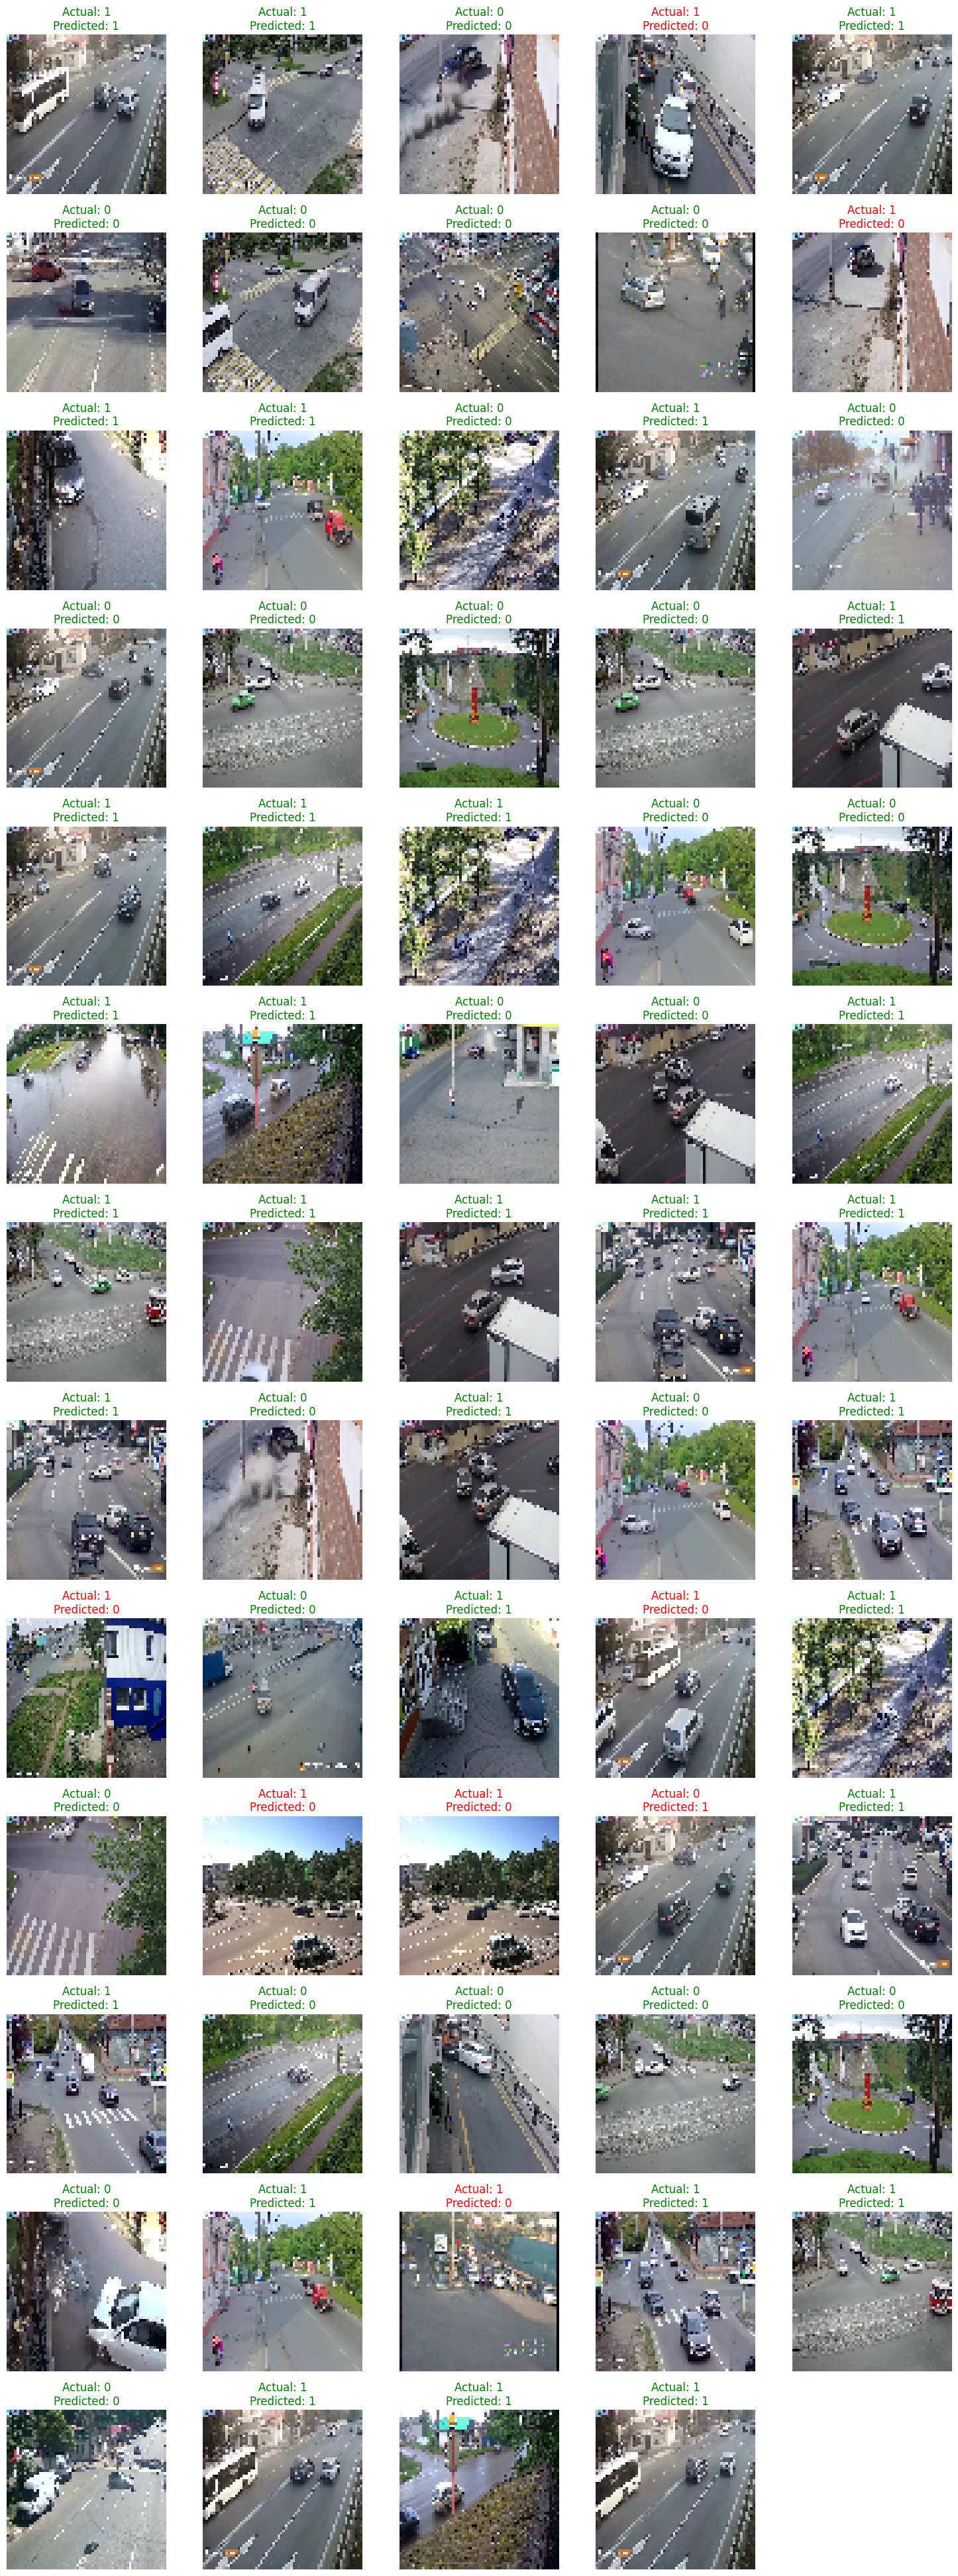

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of test data (images and labels)
images, labels = next(test_data)

# Generate predictions for the batch
predictions = model.predict(images)

# Decode actual labels and predictions
actual_classes = np.argmax(labels, axis=1)  # Convert one-hot encoded labels to class indices
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Plot a few images along with their actual and predicted labels
num_images = 64  # Number of images to display

# Dynamically calculate figsize
rows = (num_images // 5) + (num_images % 5 > 0)  # 5 images per row
figsize = (15, rows * 3)  # Width fixed, height adjusts with rows

plt.figure(figsize=figsize)  # Dynamically set the figure size

for i in range(num_images):
    plt.subplot(rows, 5, i + 1)  # 5 images per row
    plt.imshow(images[i])  # Display the image
    plt.axis('off')  # Turn off axis for better visuals
    plt.title(
        f"Actual: {actual_classes[i]}\nPredicted: {predicted_classes[i]}",
        color="green" if actual_classes[i] == predicted_classes[i] else "red"  # Color-code correct/incorrect
    )

plt.tight_layout()
plt.show()